# Lecture 5 Chebyshev Differentiation Matrices

## To isolate mathematics from the practical demands of the sciences is to invite the sterility of a cow shut away from the bulls.
##          -- Pafnuty Chebyshev (Пафну́тий Льво́вич Чебышёв)



- References: Chapter 6, Spectral Method in Matlab
- https://github.com/cpraveen/chebpy


In the last lecture we discussed why grid points must cluster at boundaries for spectral methods based on polynomials. In particular, we introduced the Chebyshev points,
$$ x_j = \cos(j\pi/N), \quad j = 0, 1,..., N. $$
which cluster as required. In this chapter we shall use these points to construct Chebyshev differentiation matrices and apply these matrices to differentiate a few functions. The same set of points will continue to be the basis of many of our computations throughout the rest of the course.


Our scheme is as followvs. Given a grid function $v$ defined on the Chebyshev points, we obtain a discrete derivative $w$ in two steps:
- Let p be the unique polynomial of degree $\leq N$ with $p(x_j)= v_j$, $0 \leq  j \leq N$.
- Set $w_j = p'(x_j)$.

This operation is linear, so it can be represented by multiplication by an $(N +1) \times ( N+1)$ matrix, which we shall denote by $D_N$:
$$ w = D_N v.$$
Here $N$ is an arbitrary positive integer, even or odd. The restriction to even $N$ in this course applies to Fourier, not Chebyshev spectral methods.

To get a feel for the interpolation process, we take a look at $N = 1$ and $N = 2$ before proceeding to the general case.

Consider first $N = 1$. The interpolatiorl points are $x_0 = 1$ and $x_1 = -1$, and the interpolating polynomial through data $v_0$ and $v_1$, written in Lagrange form, is
$$p(x) = \frac12 (1+x )v_0 + \frac12(1-x)v_1.$$

Taking the derivative gives
$$p'(x) = \frac12 v_0 - \frac12 v_1.$$

This formula implies that is the $2\times 2$ matrix whose first column contains constant entries $1/2$ and whose second column contains constant entries $-1/2$:
$$ D_1 = \left(
    \begin{array}{cc}
        \frac12 & -\frac12 \\
        \frac12 & -\frac12
    \end{array}
\right).
$$

Now consider $N = 2$. The interpolation points are $x_0 = 1$, $x_1= 0$, and $x_2 = -1$, and the interpolant is the quadratic
$$ p(x) = \frac12 x (1+x)v_0 + (1+x)(1-x)v_1 + \frac12 x(x-1)v_2.$$

The derivative is now a linear polynomial,
$$ p'(x) = (x+\frac12)v_0 - 2xv_1 + (x-\frac12)v_2.$$

The differentiation matrix $D_2$ is the $3\times 3$ matrix whose $j$th column is obtained by sampling the $j$th term of this expression at $x=1$, $0$, and $-1$:

$$ D_2 = \left(
    \begin{array}{ccc}
        \frac{3}{2} & -2 & \frac12\\
        \frac12 & 0 & -\frac12 \\
        -\frac12 & 2 & -\frac{3}{2}
    \end{array}
\right).
$$

It is no coincidence that the middle row of this matrix contains the coefficients for a centered three-point finite difference approximation to a derivative, and the other rows contain the coefficients for one-sided approximations such as the one that drives the second-order Adams-Bashforth formula for the numerical solution of ODES. The rows of higher order spectral differentiation matrices can also be viewed as vectors of coefficients of finite difference formulas, but these will be based on uneven grids and thus no longer familiar from standard applications.

We now give formulas for the entries of $D_N$ for arbitrary $N$.

## Theorem Chebyshev differentiation matrix.

For each $N \geq 1$, let the rows and columns of the $(N+1)\times (N+1)$ Chebyshev spectral diflerentiation matrix $D_N$ be indexed from $0$ to $N$. The entries of this matrix are
$$ (D_N)_{00} = \frac{2N^2+1}{6}, \quad (D_N)_{NN} = - \frac{2N^2+1}{6},$$
$$(D_N)_{jj} = \frac{-x_j}{2(1-x_j^2)}, \quad j = 1, ..., N-1, $$
$$(D_N)_{ij} = \frac{c_i}{c_j} \frac{(-1)^{i+j}}{(x_i - x_j)},\quad i\neq j, i, j=0, ..., N, $$  
where 
$$ c_i = \left\{
    \begin{array}{cc}
        2, & i=0 \text{ or }N,\\
        1, & \text{otherwise.}
    \end{array}
    \right. 
$$

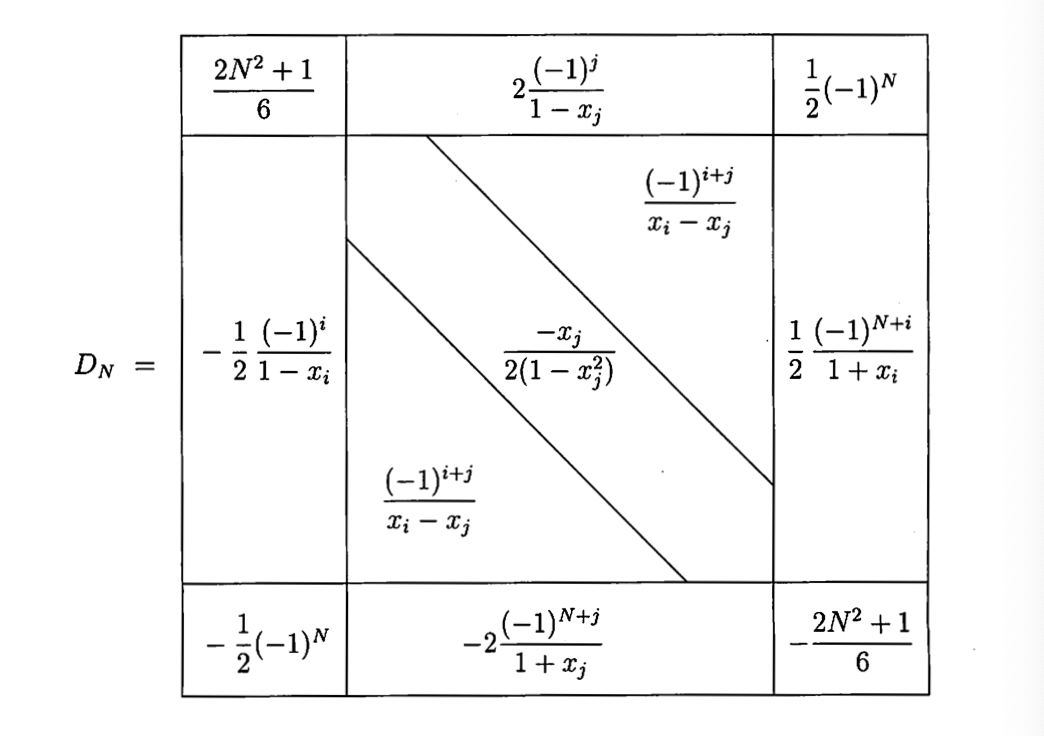

In [1]:
from IPython.display import Image
Image(filename='DN_cheby.png') 

#<img src="./DN_cheby.png" width=400 height=240/>

The function is called _cheb_, and it returns a vector $x$ and a matrix $D$. Note that this program does not compute $D_N$ exactly by above formulas . It utilizes for the off-diagonal entries but then obtains the diagonal from the identity 
$$ \sum_{j=0}^N (D_N)_{ij} = 0. $$
which has better stability properties in the presence of rounding errors. 

In [2]:
from numpy import pi,cos,arange,ones,tile,dot,eye,diag

def cheb(N):
    '''Chebushev polynomial differentiation matrix.
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
    '''
    x      = cos(pi*arange(0,N+1)/N)
    if N%2 == 0:
        x[N//2] = 0.0 # only when N is even!
    c      = ones(N+1); c[0] = 2.0; c[N] = 2.0
    c      = c * (-1.0)**arange(0,N+1)
    c      = c.reshape(N+1,1)
    X      = tile(x.reshape(N+1,1), (1,N+1))
    dX     = X - X.T
    D      = dot(c, 1.0/c.T) / (dX+eye(N+1))
    D      = D - diag( D.sum(axis=1) )
    return D,x


In [3]:
cheb(1)

(array([[ 0.5, -0.5],
        [ 0.5, -0.5]]),
 array([ 1., -1.]))

In [4]:
cheb(2)

(array([[ 1.5, -2. ,  0.5],
        [ 0.5,  0. , -0.5],
        [-0.5,  2. , -1.5]]),
 array([ 1.,  0., -1.]))

In [5]:
cheb(3)

(array([[ 3.16666667, -4.        ,  1.33333333, -0.5       ],
        [ 1.        , -0.33333333, -1.        ,  0.33333333],
        [-0.33333333,  1.        ,  0.33333333, -1.        ],
        [ 0.5       , -1.33333333,  4.        , -3.16666667]]),
 array([ 1. ,  0.5, -0.5, -1. ]))

In [6]:
cheb(4)

(array([[ 5.50000000e+00, -6.82842712e+00,  2.00000000e+00,
         -1.17157288e+00,  5.00000000e-01],
        [ 1.70710678e+00, -7.07106781e-01, -1.41421356e+00,
          7.07106781e-01, -2.92893219e-01],
        [-5.00000000e-01,  1.41421356e+00,  2.22044605e-16,
         -1.41421356e+00,  5.00000000e-01],
        [ 2.92893219e-01, -7.07106781e-01,  1.41421356e+00,
          7.07106781e-01, -1.70710678e+00],
        [-5.00000000e-01,  1.17157288e+00, -2.00000000e+00,
          6.82842712e+00, -5.50000000e+00]]),
 array([ 1.        ,  0.70710678,  0.        , -0.70710678, -1.        ]))

In [7]:
cheb(5)

(array([[  8.5       , -10.47213595,   2.89442719,  -1.52786405,
           1.10557281,  -0.5       ],
        [  2.61803399,  -1.17082039,  -2.        ,   0.89442719,
          -0.61803399,   0.2763932 ],
        [ -0.7236068 ,   2.        ,  -0.17082039,  -1.61803399,
           0.89442719,  -0.38196601],
        [  0.38196601,  -0.89442719,   1.61803399,   0.17082039,
          -2.        ,   0.7236068 ],
        [ -0.2763932 ,   0.61803399,  -0.89442719,   2.        ,
           1.17082039,  -2.61803399],
        [  0.5       ,  -1.10557281,   1.52786405,  -2.89442719,
          10.47213595,  -8.5       ]]),
 array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
        -1.        ]))

Program 11 illustrates how $D_N$ can be used to differentiate the smooth, nonperiodic function $u(x) = e^x\sin(5x)$ on grids with $N = 10$ and $N = 20$. The output shows a graph of $u(x)$ alongside a plot of the error in $u'(x)$. With $N = 20$, we get nine-digit accuracy.

# Program 11: Chebyshev differentiation of a smooth function

In [8]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import linspace,exp,sin,dot
from matplotlib.pyplot import figure,subplot,plot,title
from chebPy import *

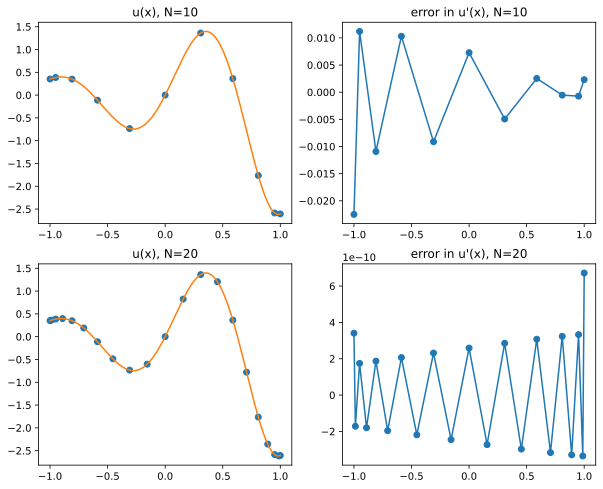

In [9]:
xx = linspace(-1.0,1.0,200,True)
uu = exp(xx)*sin(5.0*xx)
c = 1; figure(figsize=(10,8))
for N in [10,20]:
    D,x = cheb(N); u = exp(x)*sin(5.0*x)
    subplot(2,2,c); c += 1
    plot(x,u,'o',xx,uu)
    title('u(x), N='+str(N))
    
    error = dot(D,u) - exp(x)*(sin(5.0*x)+5.0*cos(5.0*x))
    subplot(2,2,c); c += 1
    plot(x,error,'o-')
    title('error in u\'(x), N='+str(N))

# Program 12: Accuracy of Chebyshev spectral differentiation

In [10]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,abs,dot,exp
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis,grid
from chebPy import *

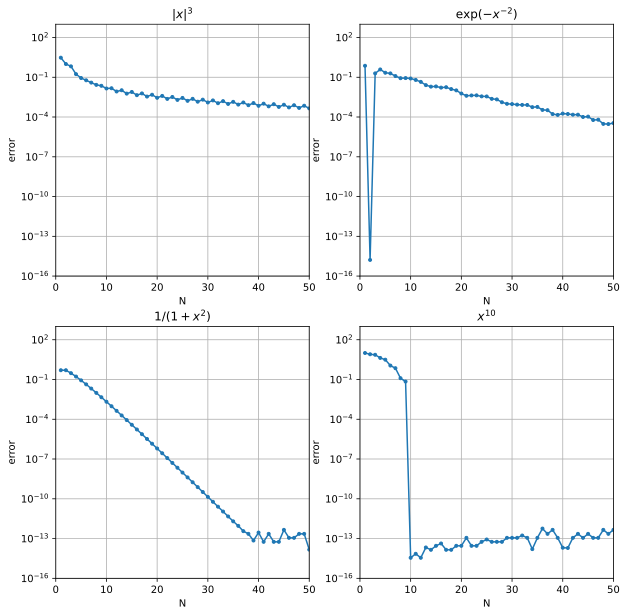

In [11]:
Nmax = 50
E = zeros((4,Nmax))
for N in range(1,Nmax+1):
    D,x = cheb(N)
    
    v = abs(x)**3          # 3rd deriv in BV
    vprime = 3.0*x*abs(x)
    E[0][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-(x+1.0e-15)**(-2))   # C-infinity
    vprime = 2.0*v/(x+1.0e-15)**3
    E[1][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+x**2)     # analytic in a [-1,1]
    vprime = -2.0*x*v**2
    E[2][N-1] = norm(dot(D,v)-vprime,inf)
    
    v = x**10
    vprime = 10.0*x**9   # polynomial
    E[3][N-1] = norm(dot(D,v)-vprime,inf)


titles = ["$|x|^3$", "$\exp(-x^{-2})$", \
          "$1/(1+x^2)$", "$x^{10}$"]
figure(figsize=(10,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(1,Nmax+1,),E[iplot][:],'.-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])
    grid('on')

Program 12, the Chebyshev analogue of Program 7, illustrates spectral accuracy more systematically. Four functions are spectrally differentiated: $|x^3|$, $e^{-x^{-2}}$, $1/(1+x^2)$, and $x^{10}$. The first has a third derivative of bounded variation, the second is smooth but not analytic, the third is analytic in a neighborhood of $[-1, 1]$, and the fourth is a polynomial, the analogue for Chebyshev spectral methods of a band-limited function for Fourier spectral methods.

**Exercise 13** Modify _cheb_ so that it computes the diagonal entries of $D_N$ by the explicit formulas rather than by the identity $$ \sum_{j=0}^N (D_N)_{ij} = 0. $$
Confirm that your code produces the same results except for rounding errors. Then see if you can find numerical evidence that it is less stable numerically than _cheb_.


**Exercise 14** The second panel of Output 12 shows a sudden dip for $N = 2$. Show that in fact the error is zero (apart from rounding errors).